In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import exponential_smoothing as es

C:\Users\user\AppData\Local\Temp\ipykernel_17252\1807907605.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
TEST_SIZE = 15

In [3]:
with open('algeria_export.txt') as f:
    data = f.readlines()
    data = [float(x.strip()) for x in data]

years = list(range(1960, 1960+len(data)))

In [4]:
df = pd.DataFrame({'Year': years, 'Export': data}).set_index('Year')
df.head()

,Export
Year,
1960,39.043173
1961,46.244557
1962,19.793873
1963,24.684682
1964,25.084059


<Axes: xlabel='Year'>

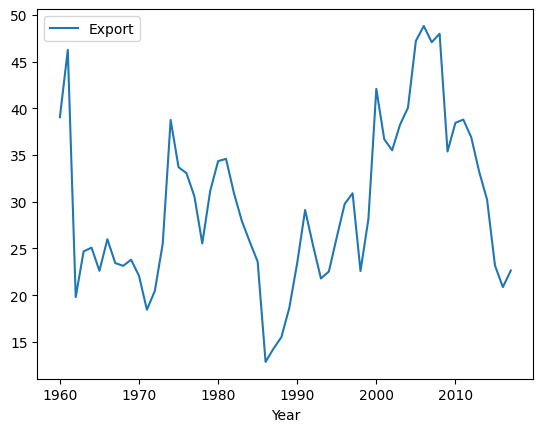

In [5]:
df.plot()

In [6]:
train, test = df[:-TEST_SIZE], df[-TEST_SIZE:]

<Axes: xlabel='Year'>

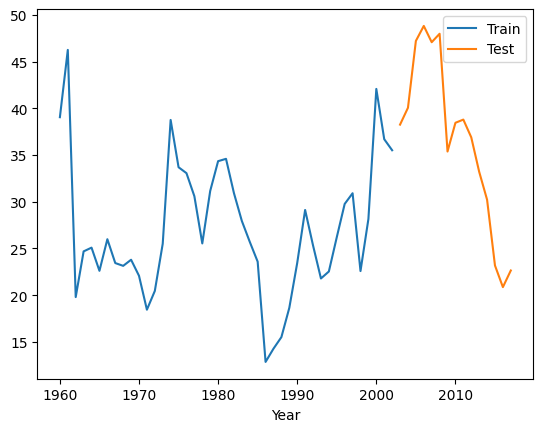

In [7]:
# plot train and test data
train.Export.plot(legend=True, label='Train')
test.Export.plot(legend=True, label='Test')

In [8]:
print(train['Export'].values)

[39.0431726  46.24455689 19.79387268 24.68468205 25.08405873 22.60394356
 25.98619752 23.43441677 23.1356346  23.78877682 22.0727334  18.44251915
 20.44956198 25.503663   38.74904361 33.68893622 33.05458393 30.58656693
 25.53583672 31.14830021 34.33846147 34.58725077 30.92485632 27.94180611
 25.71001618 23.58393289 12.85475734 14.27247473 15.50786788 18.63926334
 23.44368508 29.11782217 25.31959428 21.783877   22.53072525 26.19477598
 29.76044833 30.90631138 22.57835401 28.1501165  42.06971832 36.68930475
 35.50453311]


In [9]:
best_alpha = es.find_best_alpha(train['Export'].values, train['Export'].values[0])
print(f'Best alpha: {best_alpha}')

Best alpha: 0.76


In [10]:
one_step_forecast = es.exponential_smoothing(train['Export'].values, best_alpha, train['Export'].values[0])
print(one_step_forecast)

35.89408875695496


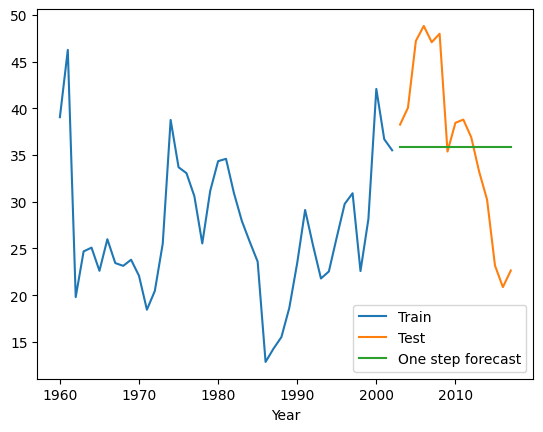

In [11]:
# plot train, test and forecast
train.Export.plot(legend=True, label='Train')
test.Export.plot(legend=True, label='Test')
# one step forecast is just float
plt.plot(test.index, [one_step_forecast]*len(test), label='One step forecast')
plt.legend()

In [16]:
x_forecast = es.exponential_smoothing_forecast_X(train['Export'].values, 0.8, train['Export'].values[0], TEST_SIZE)

In [17]:
print(x_forecast)

[39.0431726  46.24455689 19.79387268 24.68468205 25.08405873 22.60394356
 25.98619752 23.43441677 23.1356346  23.78877682 22.0727334  18.44251915
 20.44956198 25.503663   38.74904361 33.68893622 33.05458393 30.58656693
 25.53583672 31.14830021 34.33846147 34.58725077 30.92485632 27.94180611
 25.71001618 23.58393289 12.85475734 14.27247473 15.50786788 18.63926334
 23.44368508 29.11782217 25.31959428 21.783877   22.53072525 26.19477598
 29.76044833 30.90631138 22.57835401 28.1501165  42.06971832 36.68930475
 35.50453311 35.83896896 35.83896896 35.83896896 35.83896896 35.83896896
 35.83896896 35.83896896 35.83896896 35.83896896 35.83896896 35.83896896
 35.83896896 35.83896896 35.83896896 35.83896896]


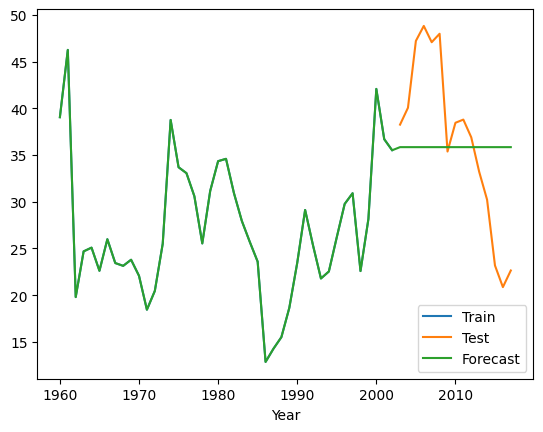

In [21]:
# plot train, test and forecast
train.Export.plot(legend=True, label='Train')
test.Export.plot(legend=True, label='Test')
# series of forecast
plt.plot(df.index, x_forecast, label='Forecast')
plt.legend()
